In [1]:
#https://archive.ics.uci.edu/ml/datasets/seismic-bumps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00266/seismic-bumps.arff'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv('datasets/seismic-bumps.csv', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
5,a,a,W,63760,195,-73,-65,a,0,0,0,0,0,0,0,0,0,0,0
6,a,a,W,207930,614,-6,18,a,2,2,0,0,0,0,0,0,1000,700,0
7,a,a,N,48990,194,-27,-3,a,1,0,1,0,0,0,0,0,4000,4000,0
8,a,a,N,100190,303,54,52,a,0,0,0,0,0,0,0,0,0,0,0
9,a,a,W,247620,675,4,25,a,1,1,0,0,0,0,0,0,500,500,0


In [5]:
print(data)

     %seismic seismoacoustic shift  genergy  gplus  gdenergy  gdpuls hazard  \
0           a              a     N    15180     48       -72     -72      a   
1           a              a     N    14720     33       -70     -79      a   
2           a              a     N     8050     30       -81     -78      a   
3           a              a     N    28820    171       -23      40      a   
4           a              a     N    12640     57       -63     -52      a   
5           a              a     W    63760    195       -73     -65      a   
6           a              a     W   207930    614        -6      18      a   
7           a              a     N    48990    194       -27      -3      a   
8           a              a     N   100190    303        54      52      a   
9           a              a     W   247620    675         4      25      a   
10          a              a     N    41950    135       -39     -36      a   
11          a              a     N    53250    140  

In [6]:
data.head()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data.tail()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print(data.shape)
print(data.columns)

(2584, 19)
Index(['%seismic', 'seismoacoustic', 'shift', 'genergy', 'gplus', 'gdenergy',
       'gdpuls', 'hazard', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5',
       'bumps6', 'bumps7', 'bumps8', 'energy', 'maxenergy', 'class'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=2584, step=1)

In [11]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


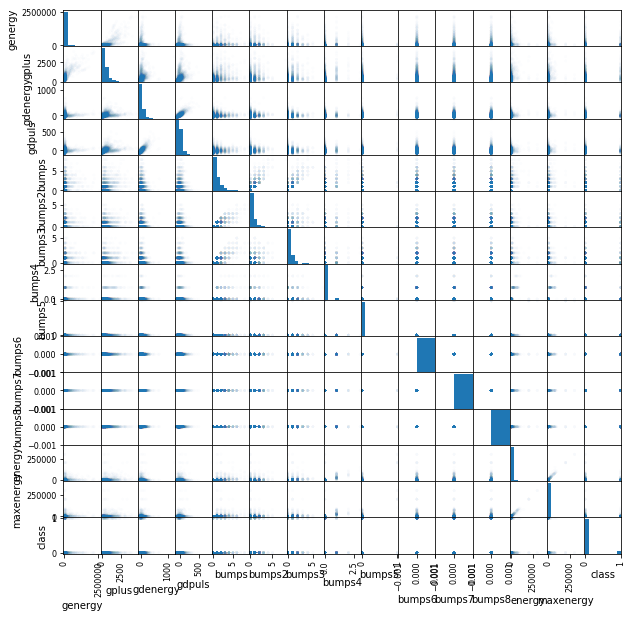

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [13]:
data.corr()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gplus,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
bumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
bumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381
bumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,NaN,NaN,NaN,0.244083,0.176480,0.205327
bumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,NaN,NaN,NaN,0.489828,0.416483,0.075458
bumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,NaN,NaN,NaN,0.773605,0.808406,0.004834
bumps6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


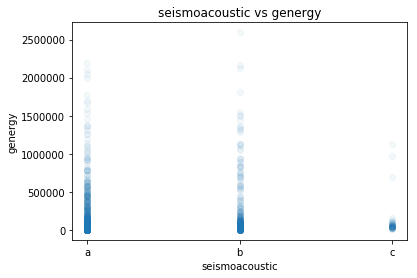

In [14]:
plt.plot(data['seismoacoustic'], data['genergy'], 'o', alpha = 0.05)
plt.xlabel('seismoacoustic')
plt.ylabel('genergy')
plt.title('seismoacoustic vs genergy')
pass

In [15]:
data.at[data['class'] == 0, 'class'] = '0'
data.at[data['class'] == 1, 'class'] = '1'

In [16]:
data.describe(include = ['object'])

,%seismic,seismoacoustic,shift,hazard,class
count,2584,2584,2584,2584,2584
unique,2,3,2,3,2
top,a,a,W,a,0
freq,1682,1580,1663,2342,2414


In [17]:
data.describe(include = 'all')

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2584,2584,2584,2.584000e+03,2584.000000,2584.000000,2584.000000,2584,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584
unique,2,3,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,a,a,W,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,1682,1580,1663,NaN,NaN,NaN,NaN,2342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2414
mean,NaN,NaN,NaN,9.024252e+04,538.579334,12.375774,4.508901,NaN,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,NaN
std,NaN,NaN,NaN,2.292005e+05,562.652536,80.319051,63.166556,NaN,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,NaN
min,NaN,NaN,NaN,1.000000e+02,2.000000,-96.000000,-96.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,1.166000e+04,190.000000,-37.000000,-36.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,2.548500e+04,379.000000,-6.000000,-6.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,5.283250e+04,669.000000,38.000000,30.250000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,NaN


In [18]:
print(data[data['bumps6'] != 0]['bumps6'])

Series([], Name: bumps6, dtype: int64)


In [19]:
data = data.drop('bumps6',   axis = 1)\
           .drop('bumps7',   axis = 1)\
           .drop('bumps8',      axis = 1) 

In [20]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['%seismic', 'seismoacoustic', 'shift', 'hazard', 'class']
['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5', 'energy', 'maxenergy']


In [21]:
for c in categorical_columns:
    print(c, data[c].unique())

%seismic ['a' 'b']
seismoacoustic ['a' 'b' 'c']
shift ['N' 'W']
hazard ['a' 'b' 'c']
class ['0' '1']


In [22]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['%seismic', 'shift', 'class'] ['seismoacoustic', 'hazard']


In [23]:
data.at[data['shift'] == 'N', 'shift'] = 0
data.at[data['shift'] == 'W', 'shift'] = 1
data['shift'].describe()

count    2584.000000
mean        0.643576
std         0.479035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shift, dtype: float64

In [24]:
data.at[data['%seismic'] == 'a', '%seismic'] = 0
data.at[data['%seismic'] == 'b', '%seismic'] = 1
data['%seismic'].describe()

count    2584.000000
mean        0.349071
std         0.476769
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: %seismic, dtype: float64

In [25]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a',
       'hazard_b', 'hazard_c'],
      dtype='object')


In [26]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [28]:
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01


In [29]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(2584, 20)


In [30]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,hazard_a,hazard_b,hazard_c,%seismic,shift
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16,0.611455,0.369969,0.018576,0.906347,0.082043,0.011610,0.349071,0.643576
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487514,0.482889,0.135048,0.291402,0.274484,0.107143,0.476769,0.479035
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns

In [32]:
type(feature_names)

pandas.core.indexes.base.Index

In [33]:
feature_names

Index(['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3',
       'bumps4', 'bumps5', 'energy', 'maxenergy', 'seismoacoustic_a',
       'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a', 'hazard_b',
       'hazard_c', '%seismic', 'shift'],
      dtype='object')

In [34]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2584, 19)
(2584,)


In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
type(y)

pandas.core.series.Series

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1808 776


# $k$NN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [40]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.06360619469026549 0.06572164948453608


In [43]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[723   0]
 [ 51   2]]


In [44]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### Подбор параметров

In [47]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.06471238938053092 10


In [48]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.06360619469026549 0.06572164948453608


# SVC

In [49]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.06415929203539823 0.06829896907216494


### Подбор параметров

In [50]:
# Долго!
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.06471238938053092 1e-05


In [52]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.06360619469026549 0.06572164948453608


# Random Forest

In [53]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.07087628865979381


### Значимость признаков

In [54]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [55]:
np.sum(rf.feature_importances_)

0.9999999999999999

In [59]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'gplus' (0.172844)
 2. feature 'genergy' (0.170550)
 3. feature 'gdpuls' (0.148023)
 4. feature 'gdenergy' (0.146815)
 5. feature 'energy' (0.084955)
 6. feature 'maxenergy' (0.064401)
 7. feature 'bumps' (0.050886)
 8. feature 'bumps2' (0.036581)
 9. feature 'bumps3' (0.026619)
10. feature '%seismic' (0.022708)
11. feature 'seismoacoustic_b' (0.016121)
12. feature 'seismoacoustic_a' (0.015694)
13. feature 'bumps4' (0.010591)
14. feature 'shift' (0.009378)
15. feature 'hazard_b' (0.007954)
16. feature 'hazard_a' (0.007539)
17. feature 'seismoacoustic_c' (0.006747)
18. feature 'bumps5' (0.001153)
19. feature 'hazard_c' (0.000441)


In [57]:
feature_names[[1,0,1]]

Index(['gplus', 'genergy', 'gplus'], dtype='object')

(-1, 19)

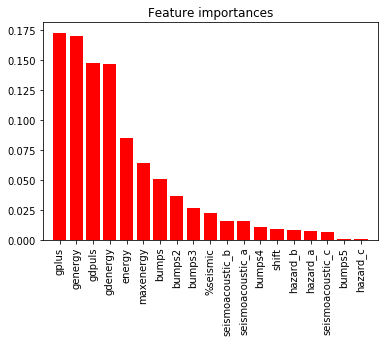

In [61]:
d_first = 19
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [62]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.07731958762886598


# AdaBoost

In [63]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.02157079646017699 0.09020618556701031


# GBT

In [64]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.07731958762886598
